In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv("used_cars.xls")

In [219]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [220]:
df1 = df.copy()

In [221]:
df.shape

(4009, 12)

In [222]:
columns = list(df.columns)

In [223]:
columns.pop()

'price'

In [224]:
def unique_values(columns):
    for column in columns:
        print(f"Unique Values of {column}:- \n {df[column].unique()} \n \n")
        print(f"Number of Unique Values of {column}:- {df[column].nunique()}")
        print("----------------------------------------------------------------------------")

In [225]:
unique_values(columns)

Unique Values of brand:- 
 ['Ford' 'Hyundai' 'Lexus' 'INFINITI' 'Audi' 'Acura' 'BMW' 'Tesla' 'Land'
 'Aston' 'Toyota' 'Lincoln' 'Jaguar' 'Mercedes-Benz' 'Dodge' 'Nissan'
 'Genesis' 'Chevrolet' 'Kia' 'Jeep' 'Bentley' 'Honda' 'Lucid' 'MINI'
 'Porsche' 'Hummer' 'Chrysler' 'Volvo' 'Cadillac' 'Lamborghini' 'Maserati'
 'Volkswagen' 'Subaru' 'Rivian' 'GMC' 'RAM' 'Alfa' 'Ferrari' 'Scion'
 'Mitsubishi' 'Mazda' 'Saturn' 'Bugatti' 'Polestar' 'Rolls-Royce'
 'McLaren' 'Buick' 'Lotus' 'Pontiac' 'FIAT' 'Karma' 'Saab' 'Mercury'
 'Plymouth' 'smart' 'Maybach' 'Suzuki'] 
 

Number of Unique Values of brand:- 57
----------------------------------------------------------------------------
Unique Values of model:- 
 ['Utility Police Interceptor Base' 'Palisade SEL' 'RX 350 RX 350' ...
 'Martin DB7 Vantage Volante' 'Impala 2LZ' 'Taycan'] 
 

Number of Unique Values of model:- 1898
----------------------------------------------------------------------------
Unique Values of model_year:- 
 [2013 2021 2022 2015

In [226]:
def number_unique_values(columns):
    for i in columns:
        print(f"{i} -- {df[i].nunique()}")

In [227]:
number_unique_values(columns)

brand -- 57
model -- 1898
model_year -- 34
milage -- 2818
fuel_type -- 7
engine -- 1146
transmission -- 62
ext_col -- 319
int_col -- 156
accident -- 2
clean_title -- 1


In [228]:
df.isnull().sum().sum()

879

In [229]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [230]:
df.isnull().sum()/ df.shape[0] * 100

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        4.240459
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
dtype: float64

# MCAR : Missing at completletly at random

- if mcar is less than 5 percentage we can drop the values from our data because 5 percentage of the data dont play that much amout of importance in making a fine model instaed of filling with another value we can simply drop the values.

In [231]:
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [232]:
df[df['accident'].isnull()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
20,Genesis,GV70 3.5T Sport,2023,"5,400 mi.",Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Green,Beige,NaN,NaN,"$60,000"
89,Subaru,Forester 2.5 X,2004,"210,703 mi.",Gasoline,165.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,M/T,Green,Beige,NaN,NaN,"$2,300"
128,Audi,Q7 3.0T Premium Plus,2015,"98,527 mi.",Gasoline,280.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,NaN,NaN,"$9,995"
129,Lucid,Air Pure,2023,"1,300 mi.",NaN,620.0HP Electric Motor Electric Fuel System,A/T,Black,Gray,NaN,NaN,"$86,900"
131,Audi,TTS 2.0T Premium Plus,2012,"72,922 mi.",Gasoline,265.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,NaN,NaN,"$25,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
3865,Alfa,Romeo Giulia Quadrifoglio,2018,"28,644 mi.",Gasoline,505.0HP 2.9L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,NaN,NaN,"$41,500"
3901,Mazda,CX-5 Grand Touring,2021,"24,781 mi.",Gasoline,2.5L I4 16V GDI DOHC,6-Speed Automatic,Machine Gray Metallic,Black,NaN,NaN,"$28,991"
3918,Porsche,911 Carrera Cabriolet,1996,"38,000 mi.",–,–,Transmission w/Dual Shift Mode,Blue,Gray,NaN,NaN,"$75,000"
3993,Porsche,911 Carrera S,2021,"7,008 mi.",Gasoline,443.0HP 3.0L Flat 6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,NaN,NaN,"$151,900"


In [233]:
df['accident'] = df['accident'].fillna("none")

In [234]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident          0
clean_title     596
price             0
dtype: int64

In [235]:
df['clean_title'] = df['clean_title'].fillna('na')

In [236]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [237]:
df['fuel_type'] = df['fuel_type'].fillna("unknown")

In [238]:
df['fuel_type'] = df['fuel_type'].str.replace("–", "unknown")
df['fuel_type'] = df['fuel_type'].str.replace("not supported", "unknown")
df['fuel_type'] = df['fuel_type'].str.replace("Plug-In Hybrid", "Hybrid")
df['fuel_type'] = df['fuel_type'].str.replace("PlugunknownIn Hybrid", "Hybrid")

In [239]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'unknown', 'Diesel'],
      dtype=object)

In [240]:
df['fuel_type'].value_counts()

fuel_type
Gasoline         3309
Hybrid            228
unknown           217
E85 Flex Fuel     139
Diesel            116
Name: count, dtype: int64

<Axes: xlabel='fuel_type'>

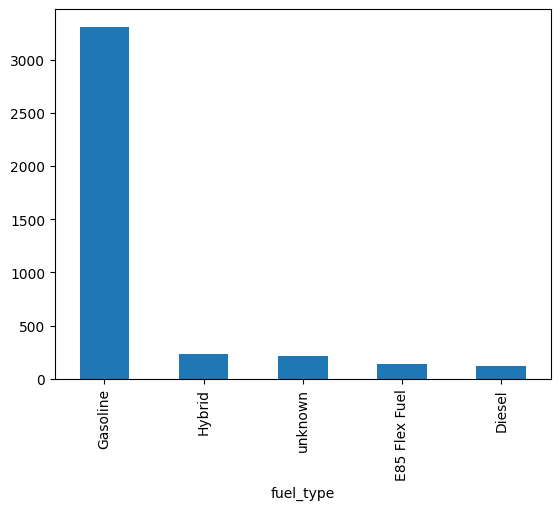

In [241]:
df['fuel_type'].value_counts().plot(kind='bar')

In [242]:
df.isnull().sum().sum()

0

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      4009 non-null   object
 10  clean_title   4009 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [244]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,na,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,na,"$34,999"


In [245]:
df['brand'].nunique()

57

<Axes: xlabel='brand'>

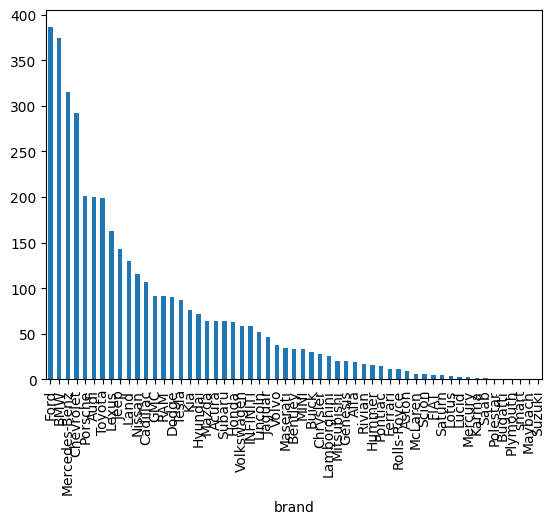

In [246]:
df['brand'].value_counts().plot(kind='bar')

In [247]:
brand_counts = df['brand'].value_counts()
brand_counts_less_than_5 = brand_counts[brand_counts < 5].index

In [248]:
for i in brand_counts_less_than_5:
    df['brand'] = df['brand'].str.replace(i, "others")

In [249]:
df['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'others', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Rolls-Royce', 'McLaren',
       'Buick', 'Pontiac', 'FIAT'], dtype=object)

<Axes: xlabel='brand'>

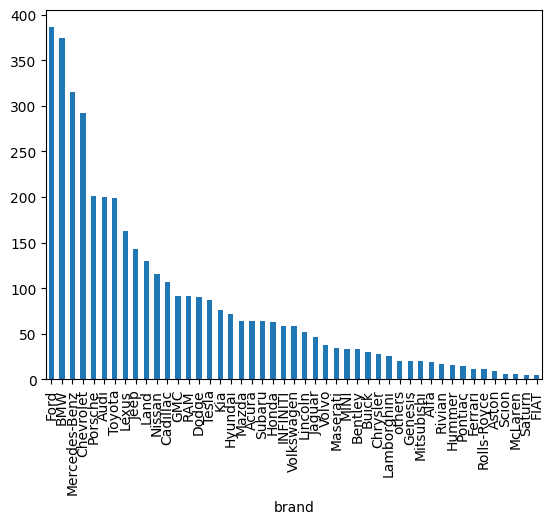

In [250]:
df['brand'].value_counts().plot(kind='bar')

In [251]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,na,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,na,"$34,999"
